In [8]:
import pandas as pd
import seaborn as sns

In [9]:
df_cv = pd.read_csv('Arquivos TCC/perfomance_cv.csv')
df_cv = df_cv.drop_duplicates(subset=['pipeline'], keep='last')
df_cv[['dataset','embedding','ml_alg']] = df_cv['pipeline'].str.split('+',expand=True)
df_cv.columns

Index(['split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'pipeline', 'params', 'dataset', 'embedding',
       'ml_alg'],
      dtype='object')

In [10]:
df_cv

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,pipeline,params,dataset,embedding,ml_alg
1,0.844875,0.813789,0.808652,0.828727,0.810456,0.825830,0.825880,0.835406,0.814313,0.827628,TC02_20news+all-MiniLM-L6-v2+KNN,"{'weights': 'distance', 'p': 1, 'n_neighbors': 3}",TC02_20news,all-MiniLM-L6-v2,KNN
2,0.785418,0.761511,0.767484,0.784788,0.772634,0.786423,0.787553,0.773096,0.774763,0.788702,TC02_20news+all-MiniLM-L6-v2+LR,{'C': 10},TC02_20news,all-MiniLM-L6-v2,LR
3,0.781523,0.757634,0.770830,0.786479,0.769856,0.781960,0.794245,0.768127,0.779245,0.785387,TC02_20news+all-MiniLM-L6-v2+SVC,{'C': 1},TC02_20news,all-MiniLM-L6-v2,SVC
4,0.822653,0.814338,0.809732,0.824270,0.819307,0.820899,0.817572,0.829844,0.817079,0.822097,TC02_20news+all-MiniLM-L12-v2+KNN,"{'weights': 'distance', 'p': 1, 'n_neighbors': 3}",TC02_20news,all-MiniLM-L12-v2,KNN
5,0.780955,0.775993,0.771935,0.762541,0.773196,0.765262,0.779213,0.774201,0.774176,0.764763,TC02_20news+all-MiniLM-L12-v2+LR,{'C': 10},TC02_20news,all-MiniLM-L12-v2,LR
6,0.774856,0.774881,0.774139,0.775343,0.773745,0.775843,0.781436,0.778670,0.771985,0.767578,TC02_20news+all-MiniLM-L12-v2+SVC,{'C': 1},TC02_20news,all-MiniLM-L12-v2,SVC
7,0.767507,0.752724,0.741839,0.728256,0.741307,0.753414,0.758569,0.752884,0.738314,0.753632,TC14_wos+all-MiniLM-L6-v2+KNN,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",TC14_wos,all-MiniLM-L6-v2,KNN
8,0.792379,0.792123,0.779848,0.760539,0.775306,0.781250,0.795834,0.764415,0.770571,0.790859,TC14_wos+all-MiniLM-L6-v2+LR,{'C': 1},TC14_wos,all-MiniLM-L6-v2,LR
9,0.794099,0.796451,0.780187,0.767930,0.776353,0.782674,0.800438,0.764082,0.771376,0.789538,TC14_wos+all-MiniLM-L6-v2+SVC,{'C': 0.1},TC14_wos,all-MiniLM-L6-v2,SVC
10,0.748923,0.738346,0.723196,0.716358,0.729923,0.729254,0.734434,0.734237,0.718763,0.723166,TC14_wos+all-MiniLM-L12-v2+KNN,"{'weights': 'distance', 'p': 2, 'n_neighbors':...",TC14_wos,all-MiniLM-L12-v2,KNN


In [11]:
df_melt=pd.melt(df_cv, id_vars=['params','pipeline','dataset','embedding','ml_alg'],value_vars=['split0_test_score','split1_test_score','split2_test_score','split3_test_score','split4_test_score','split5_test_score','split6_test_score', 'split7_test_score','split8_test_score','split9_test_score'],var_name='split',value_name='acc_split')


In [12]:
datasets = df_melt['dataset'].unique()

In [13]:
datasets

array(['TC02_20news', 'TC14_wos'], dtype=object)

<AxesSubplot: xlabel='ml_alg', ylabel='acc_split'>

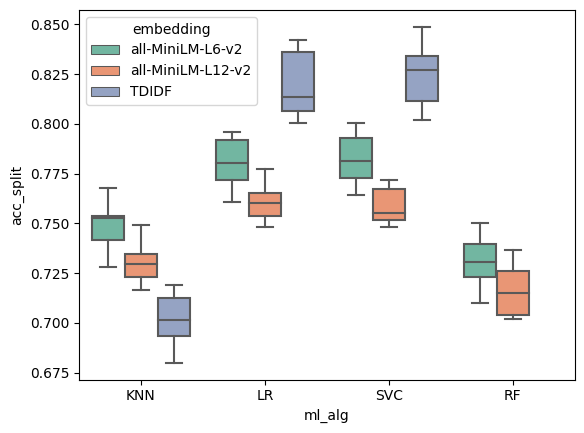

In [14]:
dataset = datasets[1]
sns.boxplot(x = df_melt[df_melt['dataset'] == dataset]['ml_alg'],
            y = df_melt[df_melt['dataset'] == dataset]['acc_split'],
            hue = df_melt[df_melt['dataset'] == dataset]['embedding'],
            palette = 'Set2')